In [84]:
#import library for analysis
import pandas as pd
#WordNetLemmatizer for reducing inflection in words to their root form
from nltk.stem import WordNetLemmatizer
#stopwords 
from nltk.corpus import stopwords
#splits a string using a regular expression
from nltk.tokenize import RegexpTokenizer
import string

In [85]:
#assigning stop words (english library) to variable
sw = stopwords.words('english')

In [106]:
#read raw GA report
data = pd.read_excel('GA-ANZ_Search_Terms20201201-20210418.xlsx')
data.head(10)

,Search Term,Total Unique Searches,Results Pageviews / Search,% Search Exits,% Search Refinements,Time after Search,Avg. Search Depth
0,size,121,1.115702,0.049587,0.214815,711.801653,10.462810
1,shipping,116,1.215517,0.129310,0.255319,356.250000,3.689655
2,payment,97,1.185567,0.257732,0.434783,278.876289,3.639175
3,tax invoice,90,1.155556,0.422222,0.038462,136.933333,2.277778
4,delivery,86,1.151163,0.232558,0.222222,351.313953,4.825581
5,invoice,85,1.223529,0.247059,0.076923,311.023529,3.400000
6,template,85,1.129412,0.058824,0.343750,614.400000,5.976471
7,colour,67,1.119403,0.059701,0.373333,461.194030,7.298507
8,background colour,64,1.281250,0.093750,0.378049,961.437500,8.937500
9,bleed,59,1.101695,0.033898,0.292308,509.627119,7.610169


In [108]:
# cols lower case and spaces repalced with underscore
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols

In [109]:
#selecting only search terms col
df = data.iloc[:, 0]
df

0                                                                                                                          size
1                                                                                                                      shipping
2                                                                                                                       payment
3                                                                                                                   tax invoice
4                                                                                                                      delivery
                                                                  ...                                                          
19995                                                                                  your contract number is missing a number
19996                                                                                       your design 

In [110]:
#function to remove punctuation from search terms ('.', ',' ect)
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [111]:
#applying function row by row
df = df.apply(lambda x: remove_punctuation(x))
df

0                                                                                                                        size
1                                                                                                                    shipping
2                                                                                                                     payment
3                                                                                                                 tax invoice
4                                                                                                                    delivery
                                                                 ...                                                         
19995                                                                                your contract number is missing a number
19996                                                                                         your design studio isnt 

In [112]:
#split strings
tokenizer = RegexpTokenizer(r'\w+')
df = df.apply(lambda x: tokenizer.tokenize(x.lower()))
df

0                                                                                                                                           [size]
1                                                                                                                                       [shipping]
2                                                                                                                                        [payment]
3                                                                                                                                   [tax, invoice]
4                                                                                                                                       [delivery]
                                                                           ...                                                                    
19995                                                                                             [your, contract, num

In [113]:
#function to remove stop words
def remove_stopwords(text):
    words =  [w for w in text if w not in stopwords.words('english')]
    return words

In [114]:
#applying function row by row
df = df.apply(lambda x: remove_stopwords(x))
df

0                                                                                               [size]
1                                                                                           [shipping]
2                                                                                            [payment]
3                                                                                       [tax, invoice]
4                                                                                           [delivery]
                                                     ...                                              
19995                                                              [contract, number, missing, number]
19996                                                                  [design, studio, isnt, working]
19997                                                                                       [holidays]
19998                                 [image, uploaded, unknown, error, t

In [115]:
lemmatizer = WordNetLemmatizer()
#function to iterate through the column
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [116]:
#lemmatize the word to the word root
df = df.apply(lambda x: word_lemmatizer(x))
df

0                                                                                   size
1                                                                               shipping
2                                                                                payment
3                                                                            tax invoice
4                                                                               delivery
                                              ...                                       
19995                                                     contract number missing number
19996                                                         design studio isnt working
19997                                                                            holiday
19998                            image uploaded unknown error try upload different image
19999    new website extremely frustrating difficult navigate customer who dealt 11 year
Name: search_term, Le

In [117]:
#looping through column and storing values to a list
text = []
for i in df:
    text.append(i)

In [118]:
#creating one string in order to visualize a wordcloud
unique_str = (" ").join(text)

In [119]:
#importing wordcloud for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

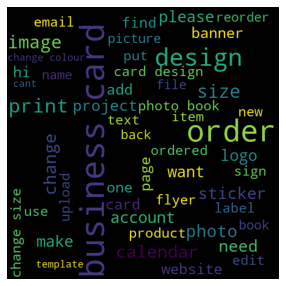

In [120]:
# show 50 words in the wordcloud
wordcloud = WordCloud(width=500, height=500, max_words=50).generate(unique_str)
plt.figure(figsize=(10,5))
# plot the WordCloud image 

plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [121]:
#splitting into multiple strings for barplot visualization
word_list = pd.DataFrame(unique_str.split())
word_list_100 = word_list.value_counts()[word_list.value_counts()>100]

<AxesSubplot:xlabel='0'>

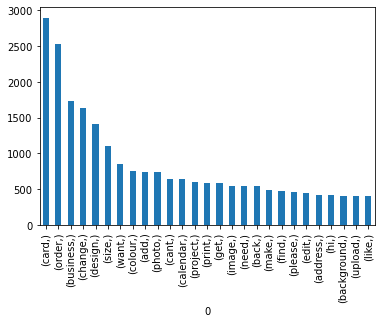

In [122]:
#barplot where count is greater than 400
word_list.value_counts()[word_list.value_counts()>400].plot(kind='bar')

In [123]:
#function to count words
def word_count_func(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [124]:
#applying function to the unique_str
word_count = word_count_func(unique_str)

In [125]:
type(word_count)

dict

In [126]:
#converting dict to a dataframe
search_terms = pd.DataFrame(word_count.items())
#renaming columns
search_terms.columns = ['search_term', 'count']
#sorting dataframe decending and reset index
search_terms_ordered = search_terms.sort_values(['count'], ascending=False).reset_index(drop=True)
search_terms_ordered

,search_term,count
0,card,2897
1,order,2528
2,business,1736
3,change,1641
4,design,1406
...,...,...
6342,dupicate,1
6343,34,1
6344,worth,1
6345,backyard,1


In [128]:
#reading orignal GA data to compare with top search terms
data_or = data['search_term']
data_or

0                                                                                                                          size
1                                                                                                                      shipping
2                                                                                                                       payment
3                                                                                                                   tax invoice
4                                                                                                                      delivery
                                                                  ...                                                          
19995                                                                                  your contract number is missing a number
19996                                                                                       your design 

In [130]:
#pull randomly 100 search quereies from the GA raw report. Repalce 'edit' with the search term you want.
pd.options.display.max_rows = 100
pd.set_option('display.max_colwidth', 400)
st_card = data[data['search_term'].str.contains('card')].iloc[:,1]

,search_term,total_unique_searches,results_pageviews_/_search,%_search_exits,%_search_refinements,time_after_search,avg._search_depth
16,business cards,48,1.250000,0.187500,0.166667,992.770833,11.625000
53,business card size,24,1.000000,0.083333,0.250000,471.250000,3.791667
60,business card template,22,1.045455,0.045455,0.304348,337.045455,4.136364
64,business card,21,1.285714,0.142857,0.259259,309.571429,3.619048
111,credit card,14,1.000000,0.142857,0.428571,559.428571,4.000000
...,...,...,...,...,...,...,...
19981,"you have to buy 100 thank you cards, or can i buy less?",1,1.000000,0.000000,0.000000,22.000000,1.000000
19984,you printed business cards for our deerskin crafts business.,1,1.000000,0.000000,0.000000,242.000000,4.000000
19985,you sent incorrect buisness cards,1,1.000000,0.000000,1.000000,40.000000,0.000000
19987,you sent me cards without envelopes that fit,1,1.000000,1.000000,0.000000,0.000000,0.000000


In [51]:
word_list_100.to_csv(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/word_list_100.csv')

In [50]:
word_list_100

card         2897
order        2528
business     1736
change       1641
design       1406
             ... 
photobook     104
domain        104
looking       103
history       102
dont          101
Length: 129, dtype: int64

In [54]:
df['SearchTerm']

0                                                                                                                          size
1                                                                                                                      shipping
2                                                                                                                       payment
3                                                                                                                   tax invoice
4                                                                                                                      delivery
                                                                  ...                                                          
19995                                                                                  your contract number is missing a number
19996                                                                                       your design 

In [ ]:
st.to_csv(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/word_list_100.csv')

In [153]:
data[data['search_term'].str.contains('project')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/project.xlsx', index=False)

In [152]:
data[data['search_term'].str.contains('print')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/print.xlsx', index=False)
data[data['search_term'].str.contains('image')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/image.xlsx', index=False)
data[data['search_term'].str.contains('address')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/address.xlsx', index=False)
data[data['search_term'].str.contains('background')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/background.xlsx', index=False)
data[data['search_term'].str.contains('edit')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/edit.xlsx', index=False)

data[data['search_term'].str.contains('print')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/print.xlsx', index=False)
data[data['search_term'].str.contains('sticker')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/sticker.xlsx', index=False)
data[data['search_term'].str.contains('delivery')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/delivery.xlsx', index=False)

In [154]:
data[data['search_term'].str.contains('upload')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/upload.xlsx', index=False)

In [155]:
data[data['search_term'].str.contains('background')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/background.xlsx', index=False)

In [156]:
data[data['search_term'].str.contains('book')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/book.xlsx', index=False)
data[data['search_term'].str.contains('text')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/st_list/text.xlsx', index=False)